<a href="https://colab.research.google.com/github/blackfox2001/bmstu/blob/master/tmo2022/laba5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа 5**

## Задание

Выберите набор данных (датасет) для решения задачи классификации или регресии.

В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

С использованием метода train_test_split разделите выборку на обучающую и тестовую.

Обучите следующие ансамблевые модели:

одну из моделей группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья);

одну из моделей группы бустинга;

одну из моделей группы стекинга.

Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

## Выбор и загрузка данных


В качестве датасета будем использовать набор данных, содержащий данные о трудоустройстве студентов. Данный набор доступен по адресу: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?select=student-por.csv

sl_no - серийный номер (номер в датасете);

gender - пол;

ssc_p - процент среднего образования;

ssc_b - Министерство образования (центральное или другое);

hsc_p - процент высшего образования;

hsc_b - Министерство образования (центральное или другое);

hsc_s - специализация полного среднего образования;

degree_p - процент выпустившихся;

degree_t - бакалавриат (сфера образования);

workex - опыт работы;

etest_p - процент теста на трудоустройство;

specialisation - специальность после выпуска;

mba_p - MBA процент;

status - статус трудоустройства (устроен или не устроен);

salary - запралата, которую предлагают кандидатам.

Импортируем библиотеки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline
sns.set(style="ticks")

Загружаем данные

In [6]:
files.upload()

Saving Placement_Data_Full_Class.csv to Placement_Data_Full_Class.csv


{'Placement_Data_Full_Class.csv': b'sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary\r\n1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55,Mkt&HR,58.8,Placed,270000\r\n2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000\r\n3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75,Mkt&Fin,57.8,Placed,250000\r\n4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66,Mkt&HR,59.43,Not Placed,\r\n5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.5,Placed,425000\r\n6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55,Mkt&Fin,51.58,Not Placed,\r\n7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,\r\n8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67,Mkt&Fin,62.14,Placed,252000\r\n9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000\r\n10,M,58.00,Central,70.

In [7]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

## Первичный анализ

Первые 5 строк датасета:

In [8]:
data.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0

Определим размер датасета:

In [9]:
data.shape

(215, 15)

Определим типы данных:

In [10]:
data.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

## Обработка пропусков

Проверим наличие пропусков:

In [11]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Как мы видим, есть незаполненная зарплата, но поскольку она не заполнена из-за того, что данный человек не трудоустроен, то заполним поле зарплаты нулями.

In [12]:
data = data.fillna(0)

In [13]:
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Теперь датасет выглядит следующим образом:

In [14]:
data.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       0.0  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0

## Оптимизация данных

Для кодирования столбцов категорий будем использовать LabelEncoder:

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
legend = LabelEncoder()
legendarr = legend.fit_transform(data["gender"])
data["gender"] = legendarr
data = data.astype({"gender":"float"})

lerace = LabelEncoder()
leracearr = lerace.fit_transform(data["ssc_b"])
data["ssc_b"] = leracearr
data = data.astype({"ssc_b":"float"})

leeduc = LabelEncoder()
leeducarr = leeduc.fit_transform(data["hsc_b"])
data["hsc_b"] = leeducarr
data = data.astype({"hsc_b":"float"})

lelunch = LabelEncoder()
leluncharr = lelunch.fit_transform(data["hsc_s"])
data["hsc_s"] = leluncharr
data = data.astype({"hsc_s":"float"})

leprep = LabelEncoder()
lepreparr = leprep.fit_transform(data["degree_t"])
data["degree_t"] = lepreparr
data = data.astype({"degree_t":"float"})

lework = LabelEncoder()
leworkarr = leeduc.fit_transform(data["workex"])
data["workex"] = leworkarr
data = data.astype({"workex":"float"})

lespec = LabelEncoder()
lespecarr = lespec.fit_transform(data["specialisation"])
data["specialisation"] = lespecarr
data = data.astype({"specialisation":"float"})

lestatus = LabelEncoder()
lestatusarr = leprep.fit_transform(data["status"])
data["status"] = lestatusarr
data = data.astype({"status":"float"})

Проверим кодирование:

In [17]:
np.unique(legendarr), np.unique(leracearr), np.unique(leeducarr), np.unique(leluncharr), np.unique(lepreparr), np.unique(leworkarr), np.unique(lespecarr), np.unique(lestatusarr)

(array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1, 2]),
 array([0, 1, 2]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]))

И замену в датасете:

In [18]:
data.head()

sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0      1     1.0  67.00    1.0  91.00    1.0    1.0     58.00       2.0   
1      2     1.0  79.33    0.0  78.33    1.0    2.0     77.48       2.0   
2      3     1.0  65.00    0.0  68.00    0.0    0.0     64.00       0.0   
3      4     1.0  56.00    0.0  52.00    0.0    2.0     52.00       2.0   
4      5     1.0  85.80    0.0  73.60    0.0    1.0     73.30       0.0   

   workex  etest_p  specialisation  mba_p  status    salary  
0     0.0     55.0             1.0  58.80     1.0  270000.0  
1     1.0     86.5             0.0  66.28     1.0  200000.0  
2     0.0     75.0             0.0  57.80     1.0  250000.0  
3     0.0     66.0             1.0  59.43     0.0       0.0  
4     0.0     96.8             0.0  55.50     1.0  425000.0

## Разделение выборки на обучающую и тестовую

Разделим выборку с помощью функции train_test_split:

In [19]:
from sklearn.model_selection import train_test_split

In [85]:
X = data.drop("salary", axis=1)
y = data["salary"]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(data, data["salary"], random_state=1)

Размеры обучающей выборки и тестовой выборки:

In [98]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((161, 15), (161,), (54, 15), (54,))

## Обучение ансамблевых моделей

## Модель бэггинга

In [99]:
from sklearn.ensemble import BaggingRegressor

Обучим модель на 5 деревьях:

In [100]:
bagging_model = BaggingRegressor(n_estimators=5, oob_score=True, random_state=10)
bagging_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:1164: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "


BaggingRegressor(n_estimators=5, oob_score=True, random_state=10)

Сконвертируем объекты, которые были использованы в обучающей выборке каждого дерева, в двоичную матрицу (1 соответствует элементам, попавшим в обучающую выборку):

In [101]:
bin_array = np.zeros((5, X_train.shape[0]))
for i in range(5):
    for j in bagging_model.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
        0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
        0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
        1.],
       [1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,

Визуализируем эти данные:

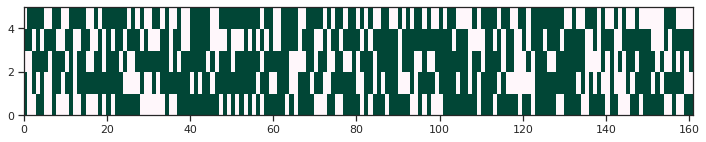

In [102]:
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='PuBuGn')
plt.show()

Оценим Out-of-bag error, теоретическое значение 37%

In [103]:
for i in range(5):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели № {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели № 1 размер OOB составляет 37.89%
Для модели № 2 размер OOB составляет 35.4%
Для модели № 3 размер OOB составляет 34.160000000000004%
Для модели № 4 размер OOB составляет 36.65%
Для модели № 5 размер OOB составляет 42.24%


Визуализируем обученные деревья:

In [104]:
from io import StringIO 
from IPython.display import Image
import graphviz
import pydotplus
from sklearn.tree import export_graphviz

In [105]:
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

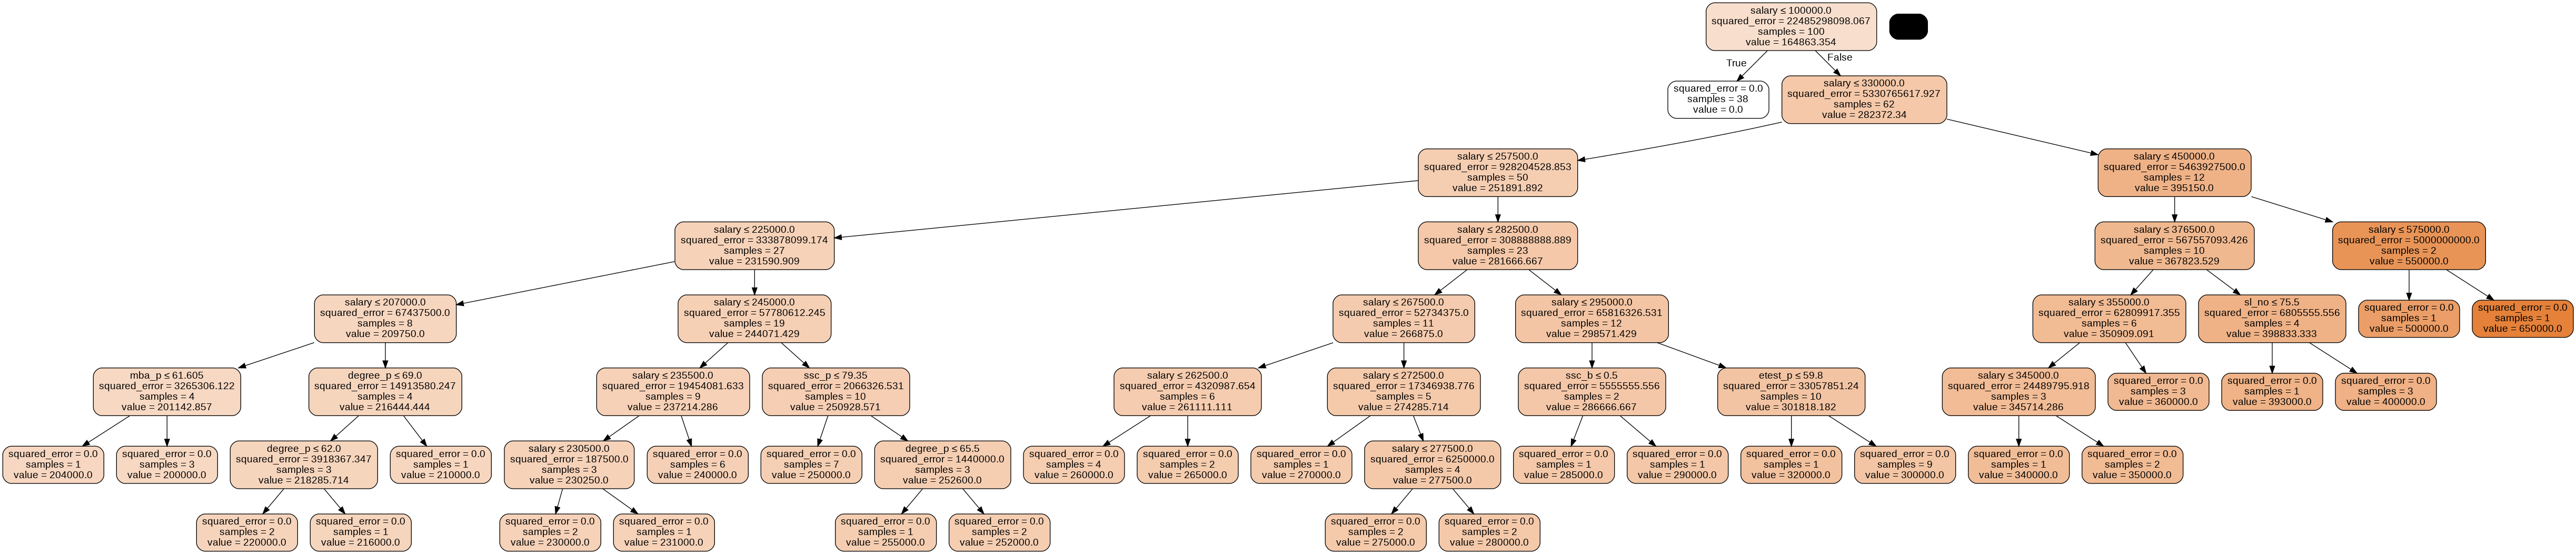

In [106]:
Image(get_png_tree(bagging_model.estimators_[0], data.columns))

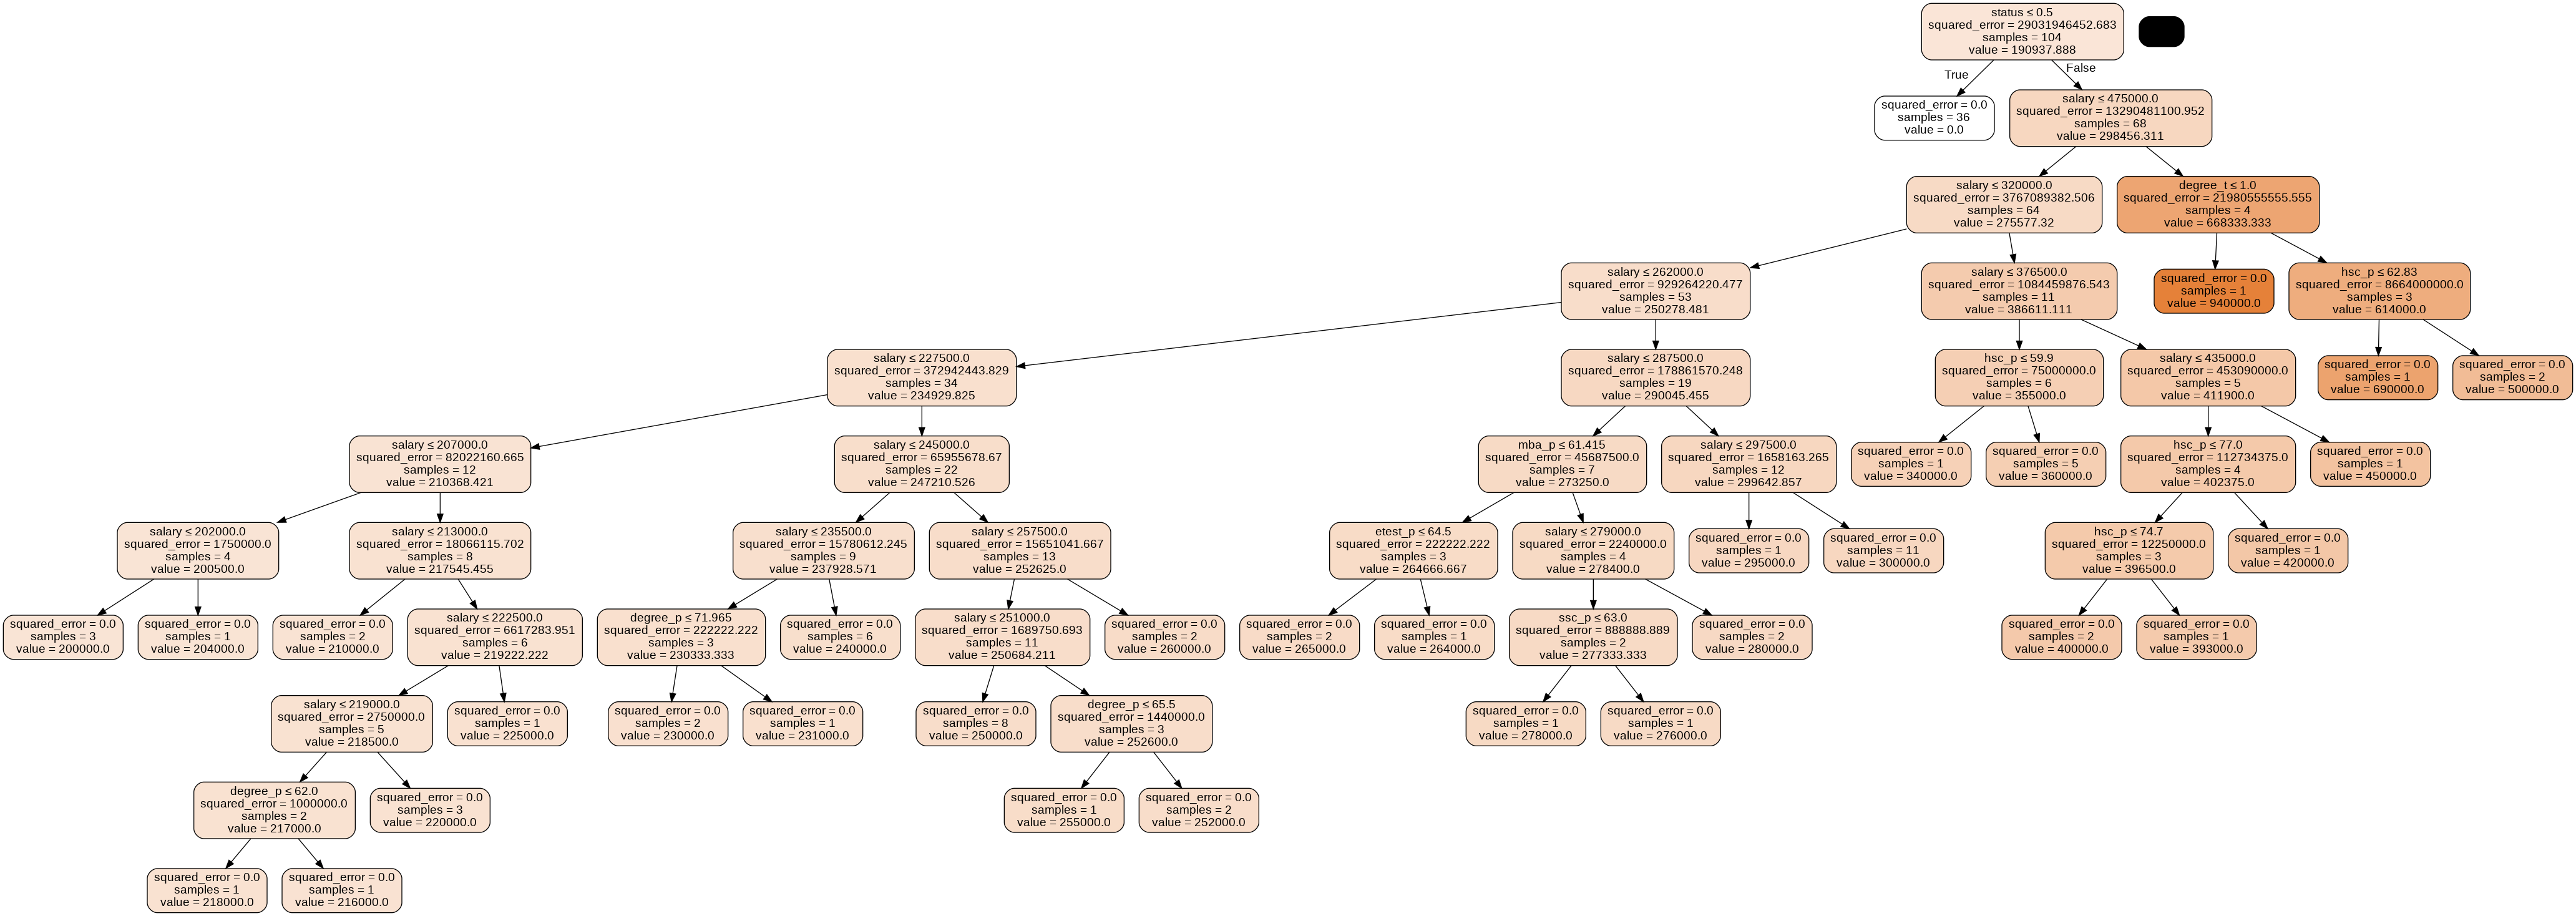

In [107]:
Image(get_png_tree(bagging_model.estimators_[1], data.columns))

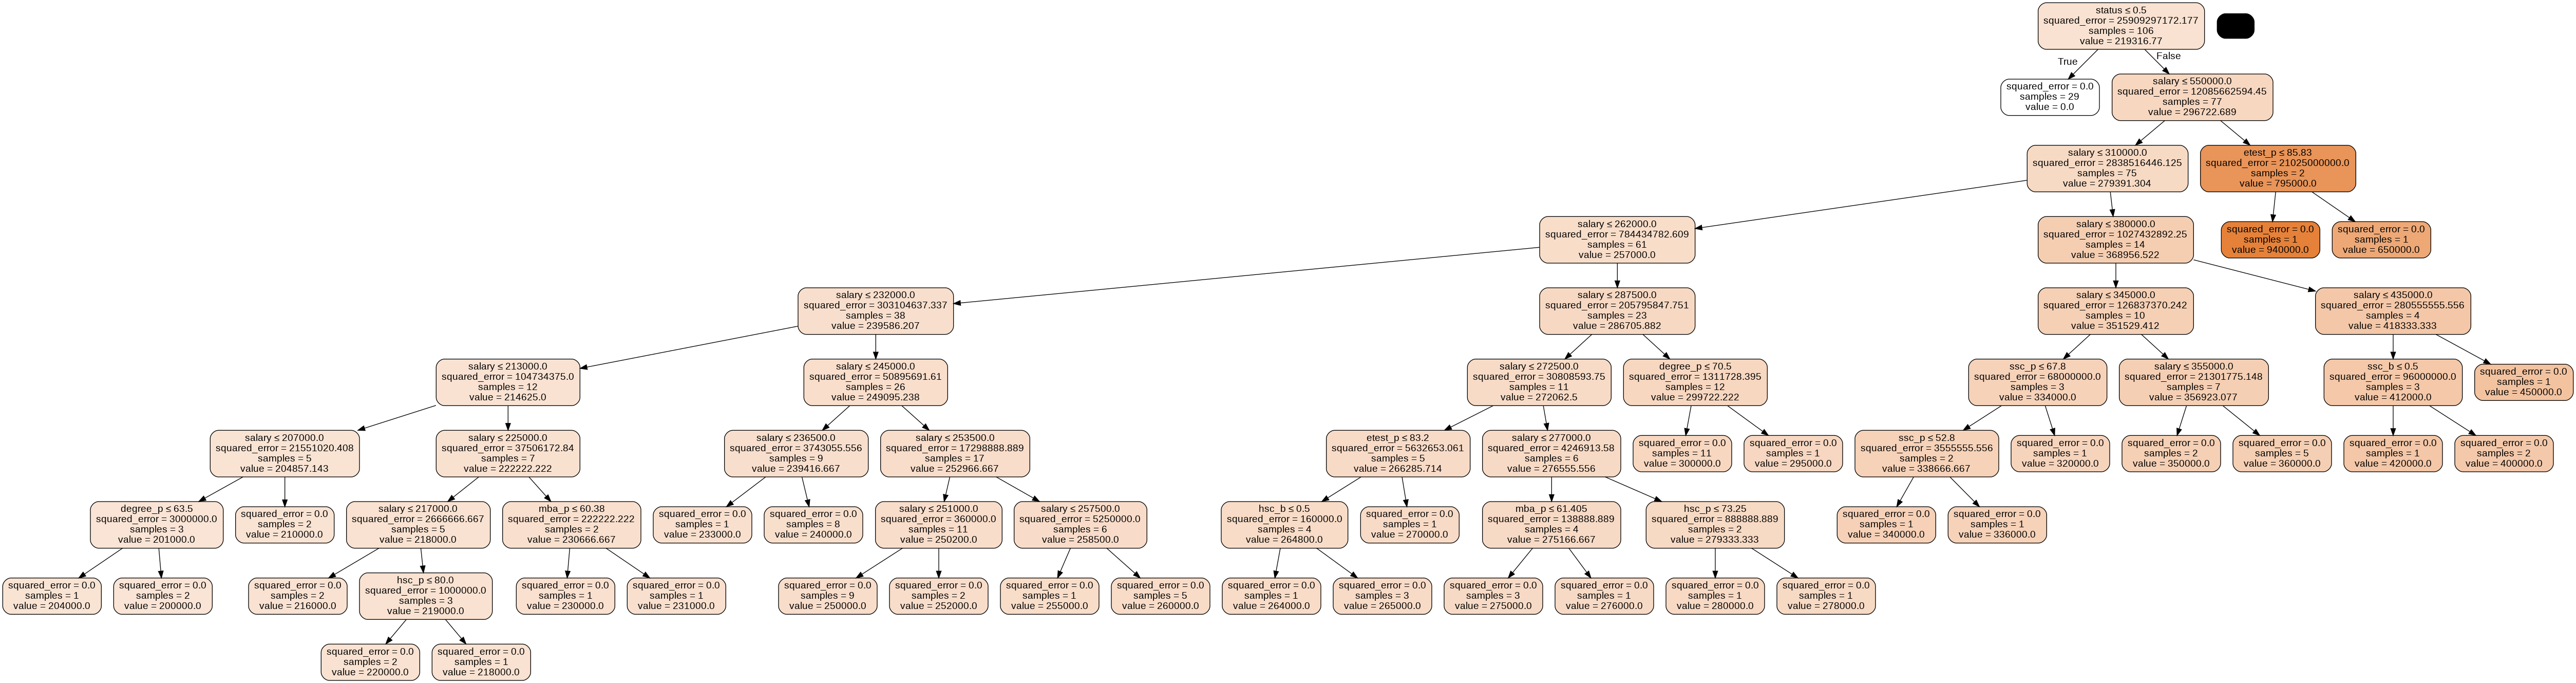

In [108]:
Image(get_png_tree(bagging_model.estimators_[2], data.columns))

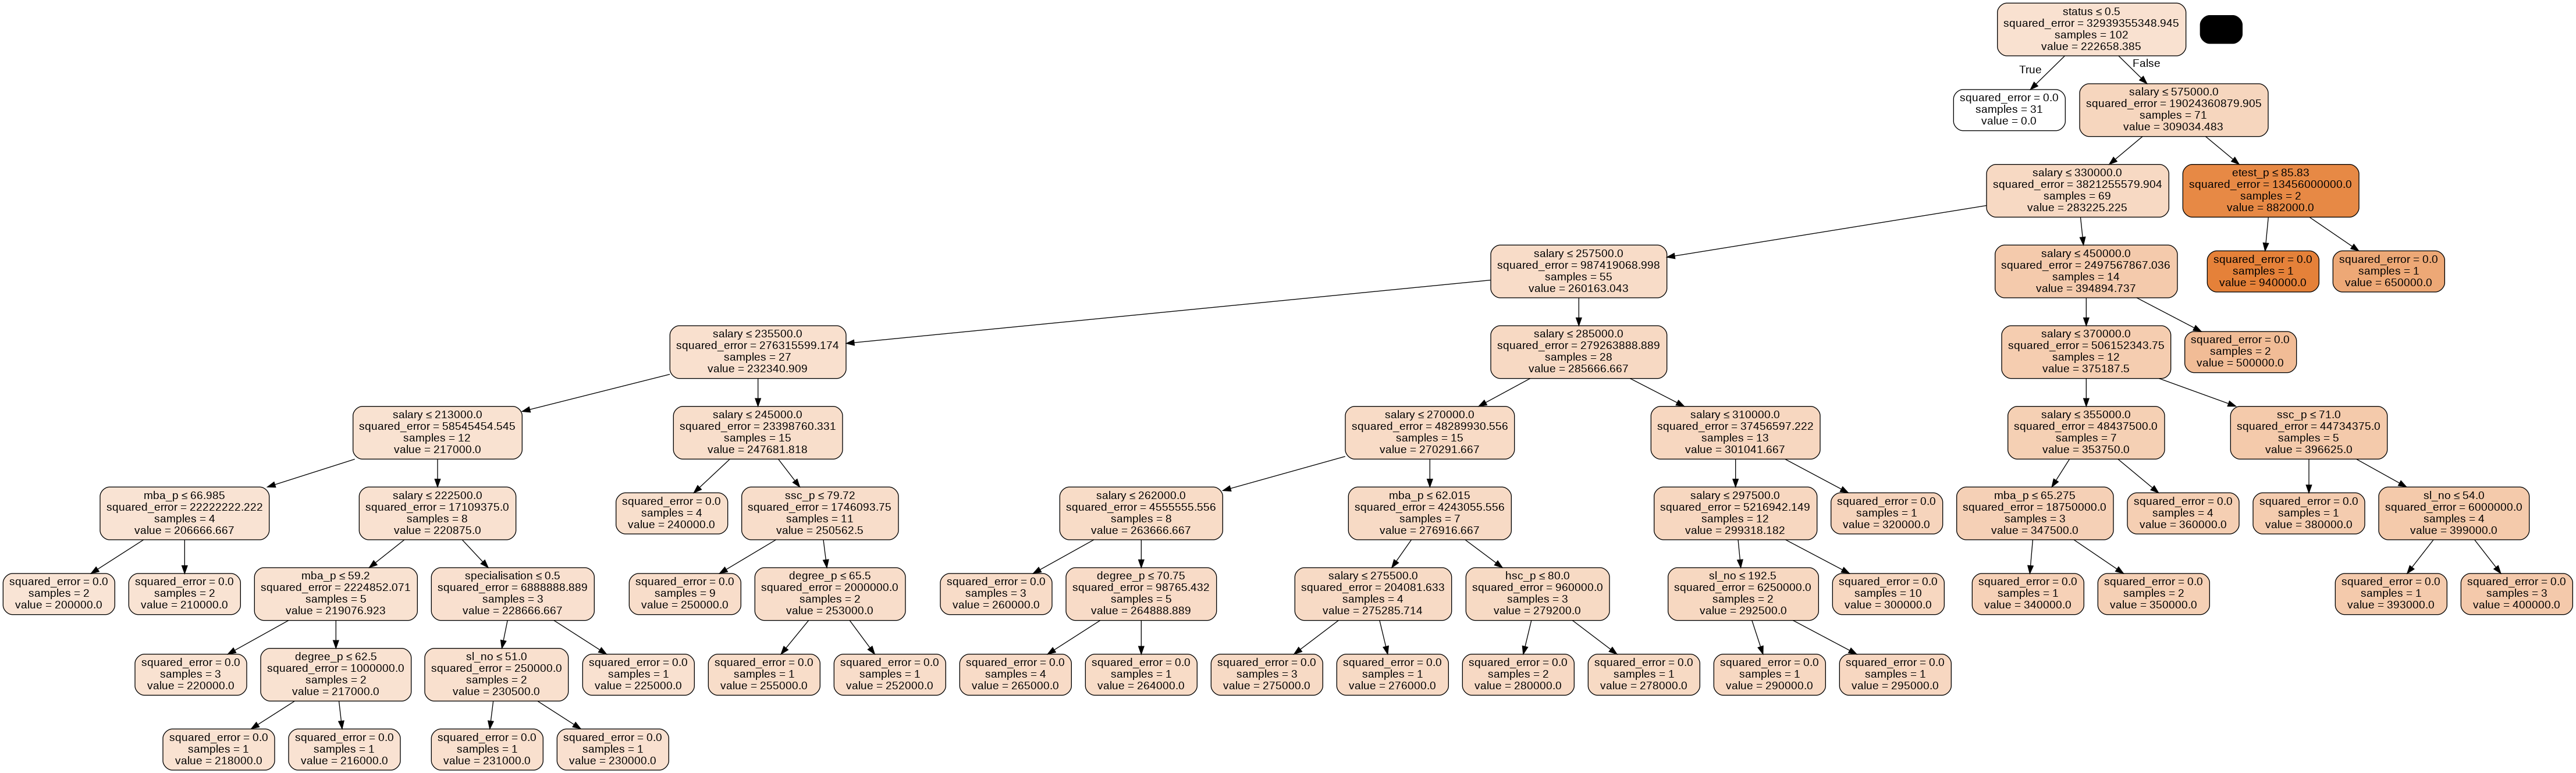

In [109]:
Image(get_png_tree(bagging_model.estimators_[3], data.columns))

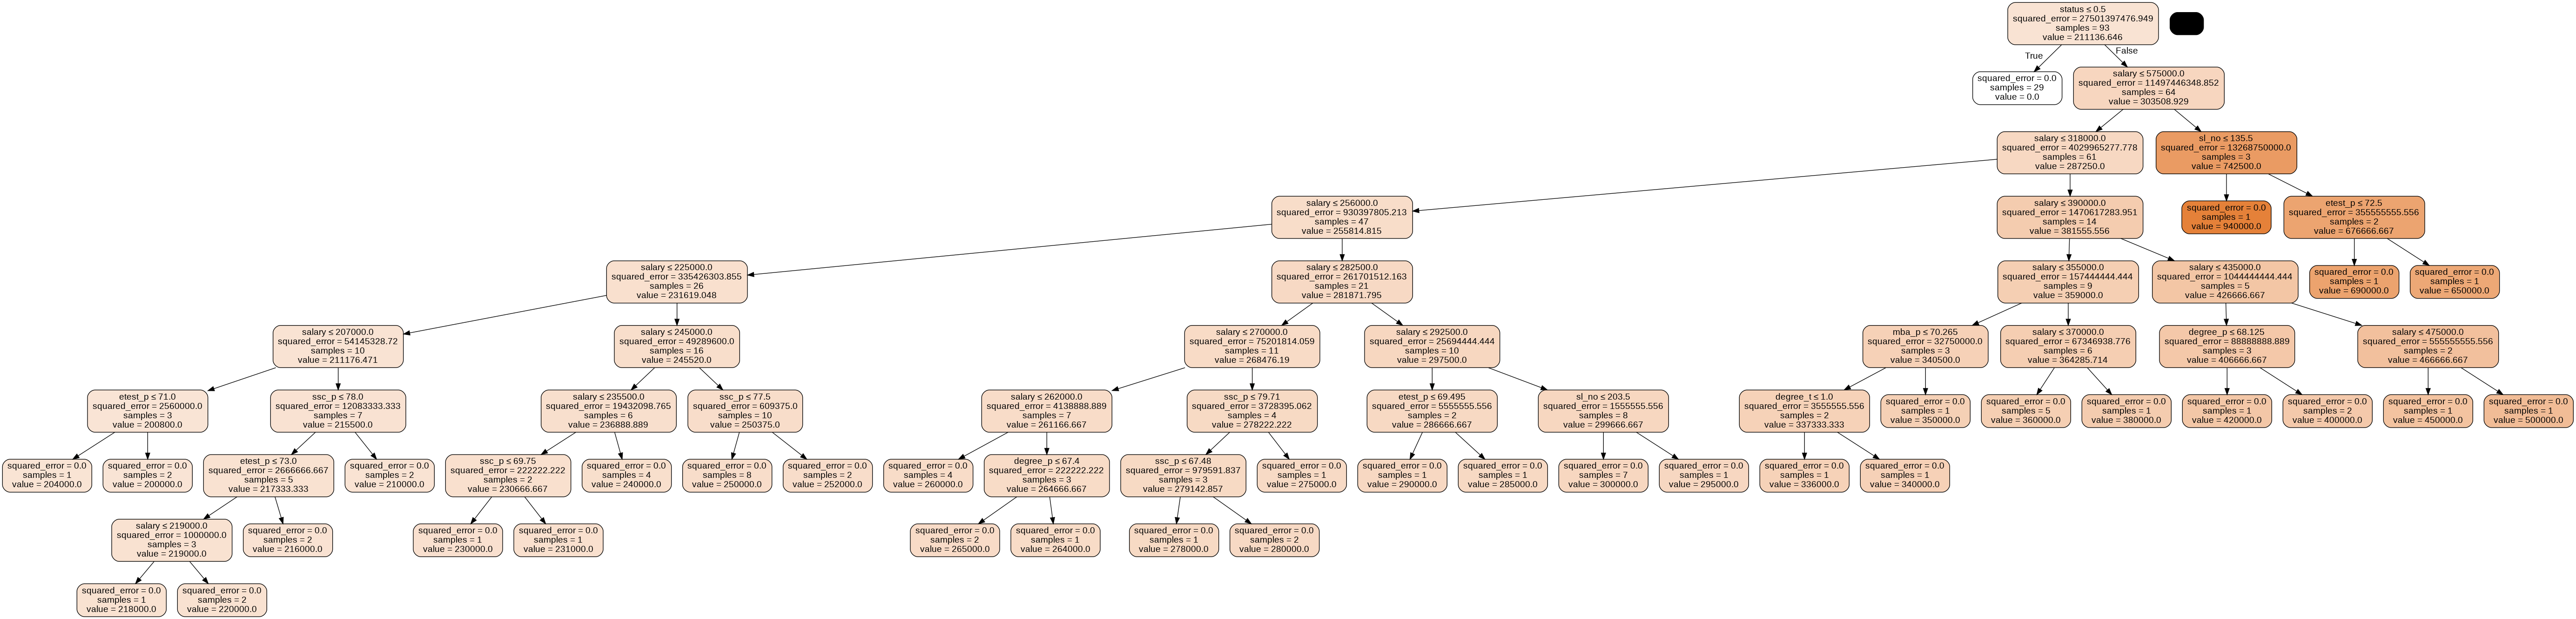

In [110]:
Image(get_png_tree(bagging_model.estimators_[4], data.columns))

Заметно, что деревья различны.


Визуализируем результаты регрессии:

In [111]:
from sklearn.tree import DecisionTreeRegressor

In [112]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(X2, y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = X2[:, 0], X2[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Na')
    ax.set_ylabel('Si')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

In [113]:
X2 = X[['ssc_p', 'hsc_p']].to_numpy()

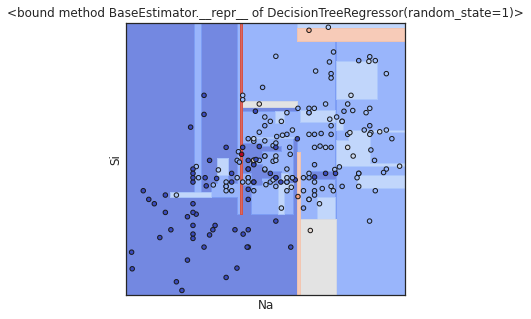

In [116]:
plot_cl(DecisionTreeRegressor(random_state=1))

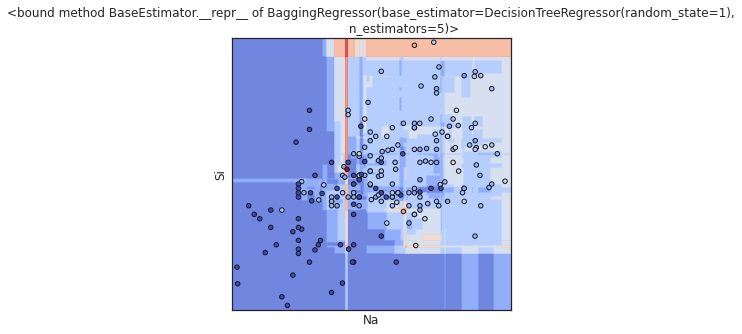

In [117]:
plot_cl(BaggingRegressor(DecisionTreeRegressor(random_state=1), n_estimators=5))

### Модель градиентного бустинга

In [118]:
from sklearn.ensemble import GradientBoostingRegressor

Обучим модель на 5 деревьях:

In [119]:
gradient_model = GradientBoostingRegressor(n_estimators=5)
gradient_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=5)

Для визуализации регрессии будем использовать функцию plot_cl из визуализации регрессии модели бэггинга:

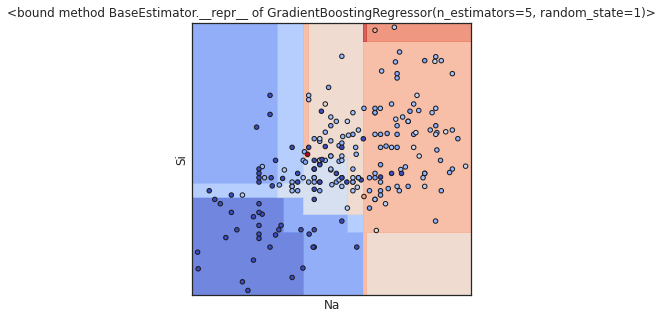

In [120]:
plot_cl(GradientBoostingRegressor(random_state=1, n_estimators=5))

### Модель стекинга

In [121]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

Реализуем модель стекинга через библиотеку heamy:

In [123]:
!pip install heamy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for heamy: filename=heamy-0.0.7-py2.py3-none-any.whl size=15366 sha256=845a5b30fb7674f0d46590ac39387e9b263f80f296abe33b65bb8791cacce544
  Stored in directory: /root/.cache/pip/wheels/f5/6c/da/55718ad26a9c8d3528b50edc2676fb33b0fb2e2b04e54cc882
Successfully built heamy


In [124]:
from heamy.estimator import Regressor
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset

In [125]:
dataset = Dataset(X_train, y_train, X_test)

Построим модели дерева, линейную модель и случайного леса для задачи регрессии:

In [128]:
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, parameters={'normalize': True}, name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'n_estimators': 5}, name='rf')

Определим их качество:

In [129]:
from sklearn.metrics import mean_absolute_error

In [130]:
def val_mae(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = mean_absolute_error(y_test, y_pred)
    print(model)
    print("MAE = {}".format(result))

In [131]:
for model in [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=5)
]:
    val_mae(model)
    print()

LinearRegression()
MAE = 3.6458537766000704e-11

DecisionTreeRegressor()
MAE = 1314.8148148148148

RandomForestRegressor(n_estimators=5)
MAE = 1274.0740740740741



## Оценка качества полученных моделей

Для оценки качества полученных моделей будем использовать метрику "Средняя абсолютная ошибка" (mean_absolute_error).

Чем ближе её значение к нулю, тем лучше качество регрессии.

Посчитаем метрику для всех моделей:

In [132]:
mean_absolute_error(y_test, bagging_model.predict(X_test))

1485.1851851851852

In [133]:
mean_absolute_error(y_test, gradient_model.predict(X_test))

66984.55795305151

In [138]:
results = model_lr.validate(k=10, scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [1.9548296938124766e-10, 1.8005682217953568e-10, 7.555599631955785e-11, 1.9353157071239453e-10, 1.1490891636117521e-10, 1.1011130863576674e-10, 2.468590424282382e-10, 1.4568514035418514e-10, 1.1858302649254583e-10, 2.234785624705936e-10]
Mean accuracy: 1.6042533553352403e-10
Standard Deviation: 5.2849837763945337e-11
Variance: 2.7931053516753428e-21


In [140]:
labels = ['Бэггинг','Бустинг', 'Стекинг']
mae = [1485.1851851851852, 66984.55795305151, 1.6042533553352403e-10]

In [142]:
def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5, 
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0.2, a-0.1, str(round(b,3)), color='white')
    plt.show()

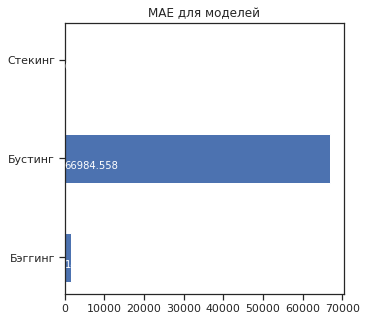

In [143]:
vis_models_quality(mae, labels, 'MAE для моделей')

Самое лучшее качество регресии наблюдается у модели стекинга.